# Importing Libraries

In [10]:
import numpy as nd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [11]:
train_tweets_csv = pd.read_csv('tweets.csv')
test_tweets_csv = pd.read_csv('test_tweets.csv')

In [12]:
train_tweets = train_tweets_csv[['tweet_text', 'sentiment']]
test_tweets = test_tweets_csv[['tweet_text']]

# Data Analysis

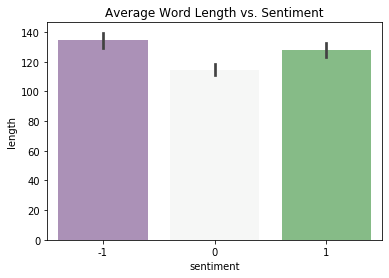

In [13]:
train_tweets['length'] = train_tweets['tweet_text'].apply(len)
train_tweets['typeofsentiment'] = train_tweets['sentiment']

fig1 = sns.barplot('sentiment','length', data=train_tweets, palette='PRGn')
plt.title('Average Word Length vs. Sentiment')
plot = fig1.get_figure()
plot.savefig('Bargraph.png')

In [14]:
train_tweets.head()

,tweet_text,sentiment,length,typeofsentiment
0,"['AaronleeGb', 'BirkenRichard', 'NFL', 'nyjets...",1,120,1
1,"['Uday', 'Sir', 'Overall', 'Professional', 'Sp...",-1,198,-1
2,"['robreiner', 'vow', 'solemnly', 'swear', 'thi...",1,211,1
3,"['RT', 'AlexandraChalup', 'Discussions', 'corr...",0,157,0
4,"['RT', 'hobipersona', 'anyones', 'wonder', 'ur...",-1,137,-1


6.0
4.0


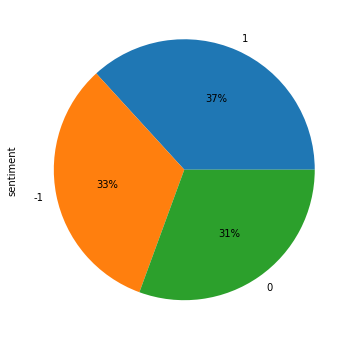

In [15]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

train_tweets['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# Model Selection & Machine Learning

In [25]:
X = train_tweets['tweet_text']
print(X)
y = train_tweets['sentiment']

0      ['AaronleeGb', 'BirkenRichard', 'NFL', 'nyjets...
1      ['Uday', 'Sir', 'Overall', 'Professional', 'Sp...
2      ['robreiner', 'vow', 'solemnly', 'swear', 'thi...
3      ['RT', 'AlexandraChalup', 'Discussions', 'corr...
4      ['RT', 'hobipersona', 'anyones', 'wonder', 'ur...
                             ...                        
930    ['RT', 'frontpage_live', 'Trump', 'fin', 'mill...
931    ['Retweet', 'today', 'Trump', 'earn', 'well', ...
932    ['RT', 'MarkDanielsPJ', 'also', 'truly', 'amaz...
933    ['RT', 'MisterAntiBully', 'clip', 'company', '...
934    ['RT', 'MtnMod', 'ArleneDickinson', 'zero', 't...
Name: tweet_text, Length: 935, dtype: object


In [26]:
test = test_tweets[['tweet_text']]

## Using Support Vector Machine:
### Training

In [27]:
tw_train, tw_test, label_train, label_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)

In [28]:
pipe = Pipeline([
    ('vector', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(
                    loss='hinge',
                    penalty='l2',
                    alpha=1e-3,
                    random_state=42,
                    max_iter=100,
                    learning_rate='optimal',
                    tol=None
                ))
])

pipe.fit(tw_train, label_train)

Pipeline(memory=None,
         steps=[('vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=N...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

### Prediction

In [29]:
svm_predictions = pipe.predict(tw_test)
classification_result = classification_report(svm_predictions,label_test)
accuracy = accuracy_score(label_test, svm_predictions)
print(classification_result)
print(accuracy)

precision    recall  f1-score   support

          -1       0.65      0.59      0.62        66
           0       0.53      0.68      0.60        47
           1       0.76      0.69      0.72        74

    accuracy                           0.65       187
   macro avg       0.65      0.65      0.65       187
weighted avg       0.66      0.65      0.66       187

0.6524064171122995


In [8]:
## Using Naive Bayes classifier:
### Training

In [30]:
print(test_tweets)

tweet_text
0    ['RT', 'TSwiftinAsia', 'learn', 'would', 'WOME...
1    ['RT', 'NottaLemming', 'liberal', 'clown', 'pl...
2    ['RT', 'Carefreeblkboyy', 'Women', 'Carefree',...
3    ['RT', 'WSJ', 'WSJopinion', 'ructions', 'Trump...
4    ['RT', 'SayWhenLA', 'nazi', 'dox', 'ban', 'spe...
..                                                 ...
929  ['RT', 'funder', 'Lindsey', 'Graham', 'liar', ...
930  ['RT', 'media', 'ignore', 'fact', 'black', 'su...
931             ['RT', 'itsjustanx', 'WOMEN', 'https']
932  ['RT', 'NFL', 'amp', 'pass', 'RavensFlock', 'N...
933  ['RT', 'TheTNHoller', 'Trump', 'pay', 'MILLION...

[934 rows x 1 columns]


In [23]:
pipe2 = Pipeline([
    ('vector', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

pipe2.fit(tw_train, label_train)

Pipeline(memory=None,
         steps=[('vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

### Prediction

In [31]:
nb_predictions = pipe2.predict(tw_test)

classification_result = classification_report(nb_predictions,label_test)
accuracy = accuracy_score(label_test, nb_predictions)
print(classification_result)
print(accuracy)

precision    recall  f1-score   support

          -1       0.53      0.56      0.55        57
           0       0.52      0.66      0.58        47
           1       0.79      0.64      0.71        83

    accuracy                           0.62       187
   macro avg       0.61      0.62      0.61       187
weighted avg       0.64      0.62      0.63       187

0.6203208556149733
